In [1]:
library(MASS) 
library(Metrics)
library(corrplot)
library(randomForest)
library(lars)
library(ggplot2)
library(xgboost)
library(Matrix)
library(methods)
library(caret)

Warning message:
"package 'Metrics' was built under R version 3.4.3"Warning message:
"package 'corrplot' was built under R version 3.4.3"corrplot 0.84 loaded
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.
Loaded lars 1.2


Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin

Warning message:
"package 'xgboost' was built under R version 3.4.3"Loading required package: lattice


In [2]:
Training <- read.csv("train.csv")
Test <- read.csv("test.csv")


In [3]:
Num_NA<-sapply(Training,function(y)length(which(is.na(y)==T)))
NA_Count<- data.frame(Item=colnames(Training),Count=Num_NA, Percentage = Num_NA/1460 *100)

NA_Count[NA_Count$Count >0,]

,Item,Count,Percentage
LotFrontage,LotFrontage,259,17.73972603
Alley,Alley,1369,93.76712329
MasVnrType,MasVnrType,8,0.54794521
MasVnrArea,MasVnrArea,8,0.54794521
BsmtQual,BsmtQual,37,2.53424658
BsmtCond,BsmtCond,37,2.53424658
BsmtExposure,BsmtExposure,38,2.60273973
BsmtFinType1,BsmtFinType1,37,2.53424658
BsmtFinType2,BsmtFinType2,38,2.60273973
Electrical,Electrical,1,0.06849315


In [4]:
#Training<- Training[,-c(7,73,74,75)]

In [5]:
# Numeric Variables
Num<-sapply(Training,is.numeric)
Num<-Training[,Num]

for(i in 1:77){
  if(is.factor(Training[,i])){
    Training[,i]<-as.integer(Training[,i])
  }
}


In [6]:
Training[is.na(Training)]<-0
Num[is.na(Num)]<-0

In [7]:
# Split the data into Training and Test Set # Ratio: 6:4 ###
Training_Inner<- Training[1:floor(length(Training[,1])*0.6),]
Test_Inner<- Training[(length(Training_Inner[,1])+1):1460,]

In [8]:
# simple linear regression
reg1<- lm(SalePrice~., data = Training_Inner)
summary(reg1)


Call:
lm(formula = SalePrice ~ ., data = Training_Inner)

Residuals:
    Min      1Q  Median      3Q     Max 
-353089  -12679   -1303   12824  192934 

Coefficients: (3 not defined because of singularities)
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.727e+06  1.577e+06   1.095 0.273758    
Id             5.145e+00  4.020e+00   1.280 0.200927    
MSSubClass    -7.137e+01  5.163e+01  -1.382 0.167288    
MSZoning      -6.364e+02  1.736e+03  -0.367 0.714012    
LotFrontage    6.470e+01  3.604e+01   1.795 0.073004 .  
LotArea        4.153e-01  1.070e-01   3.882 0.000112 ***
Street         3.691e+04  1.589e+04   2.323 0.020440 *  
LotShape       4.445e+01  8.016e+02   0.055 0.955793    
LandContour    7.364e+02  1.642e+03   0.449 0.653842    
Utilities             NA         NA      NA       NA    
LotConfig     -6.138e+02  6.372e+02  -0.963 0.335765    
LandSlope      2.892e+03  4.470e+03   0.647 0.517902    
Neighborhood   3.793e+02  1.855e+02   2.045 0.04120

In [9]:
### Selected linear regression

reg1_Modified_2<-lm(formula = SalePrice ~ MSSubClass + LotArea + 
                      Condition2 + OverallQual + OverallCond + 
                      YearBuilt  + RoofMatl +  ExterQual + 
                      BsmtQual + BsmtCond + BsmtFinSF1 + BsmtFinSF2 + 
                      BsmtUnfSF + X1stFlrSF + X2ndFlrSF + BedroomAbvGr + KitchenAbvGr + 
                      KitchenQual + TotRmsAbvGrd + Functional + Fireplaces + FireplaceQu + 
                       GarageYrBlt + GarageCars +  SaleCondition, 
                    data = Training_Inner)
summary(reg1_Modified_2)


Call:
lm(formula = SalePrice ~ MSSubClass + LotArea + Condition2 + 
    OverallQual + OverallCond + YearBuilt + RoofMatl + ExterQual + 
    BsmtQual + BsmtCond + BsmtFinSF1 + BsmtFinSF2 + BsmtUnfSF + 
    X1stFlrSF + X2ndFlrSF + BedroomAbvGr + KitchenAbvGr + KitchenQual + 
    TotRmsAbvGrd + Functional + Fireplaces + FireplaceQu + GarageYrBlt + 
    GarageCars + SaleCondition, data = Training_Inner)

Residuals:
    Min      1Q  Median      3Q     Max 
-369683  -14346     -23   12643  197531 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -4.556e+05  1.053e+05  -4.327 1.69e-05 ***
MSSubClass    -1.169e+02  2.812e+01  -4.155 3.58e-05 ***
LotArea        4.301e-01  9.011e-02   4.774 2.13e-06 ***
Condition2    -1.249e+04  3.602e+03  -3.468 0.000550 ***
OverallQual    1.164e+04  1.365e+03   8.530  < 2e-16 ***
OverallCond    5.480e+03  1.071e+03   5.118 3.81e-07 ***
YearBuilt      2.480e+02  5.241e+01   4.733 2.59e-06 ***
RoofMatl       5.771e+03  1.633

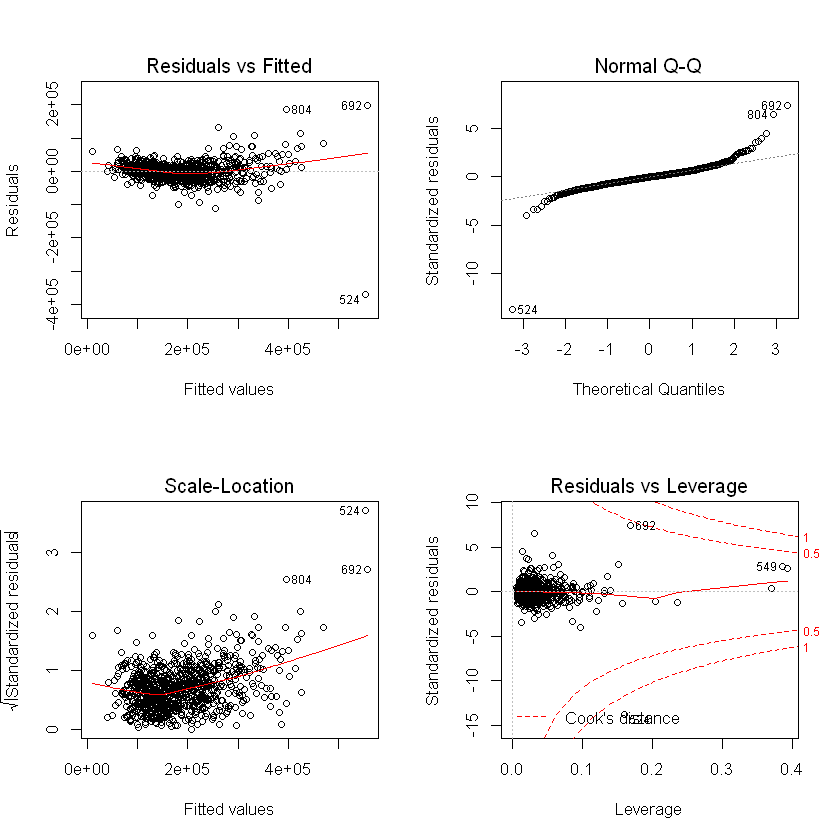

In [10]:
layout(matrix(c(1,2,3,4), 2, 2, byrow = TRUE))
plot(reg1_Modified_2)
par(mfrow=c(1,1))

Not bad, but there are many outliers that makes problems and more seems to look not completely linear the real data.

In [25]:
c(Prediction_1)


877        878        879        880        881        882        883 
122582.313 345219.166 145214.943 138736.298 168974.995 230422.661 167937.386 
       884        885        886        887        888        889        890 
116768.184  99991.034 249668.843 142517.546 140752.512 300712.763 182166.141 
       891        892        893        894        895        896        897 
111834.314 176832.175 149837.198 159991.715 107436.229 168557.242  81499.155 
       898        899        900        901        902        903        904 
152197.558 451967.164 130510.572  91552.210 145744.619 205446.544 248762.875 
       905        906        907        908        909        910        911 
114780.143 118085.190 260101.367 212318.859 134123.558 194474.913 182902.229 
       912        913        914        915        916        917        918 
142662.346  76520.407 161256.634 155676.496  71366.637   5656.902 134437.758 
       919        920        921        922        923        924        925 
266357.698 208226.171 207139.002 172327.035 193060.059 210974.942 224088.598 
       926        927        928        929        930        931        932 
163565.989 299255.429 205449.612 257026.476 221328.208 237795.728 120573.285 
       933        934        935        936        937        938        939 
332181.488 208144.480 257557.975  97074.135 206380.036 241435.030 252128.011 
       940        941        942        943        944        945        946 
225146.653 182361.887 246252.354 113123.988 137102.205 151909.837 173876.161 
       947        948        949        950        951        952        953 
128942.152 290540.629 212907.860 181967.967 132158.914  93091.120 120884.690 
       954        955        956        957        958        959        960 
153758.737 145895.891 167813.993 134498.886 128580.023 211123.139 181911.573 
       961        962        963        964        965        966        967 
119697.573 276200.332 171015.559 294285.358 230905.287 198920.086 137960.410 
       968        969        970        971        972        973        974 
137369.281  54978.402 109103.509  65305.985 200582.991 108755.746 209868.715 
       975        976        977        978        979        980        981 
220206.197 180919.317  96461.969 207578.787  82582.043 137760.601 226762.380 
       982        983        984        985        986        987        988 
296800.900 201020.108 260237.537 135072.281 107741.781 134446.316 377731.722 
       989        990        991        992        993        994        995 
193534.592 193797.336 293732.716 216421.692 208891.164 172455.086 354442.847 
       996        997        998        999       1000       1001       1002 
 83263.599 131868.630 172035.597  63350.523 209466.310  93252.657  87805.652 
      1003       1004       1005       1006       1007       1008       1009 
248667.810  97541.361 215056.945 140578.648 200563.365  75682.883 245463.396 
      1010       1011       1012       1013       1014       1015       1016 
 96120.592 111873.196 113893.923 141104.312  74603.154 121754.083 228324.648 
      1017       1018       1019       1020       1021       1022       1023 
220067.078 201175.420 181199.534 201754.113 159566.628 215223.531 117111.873 
      1024       1025       1026       1027       1028       1029       1030 
202452.937 359311.423 114987.943 159789.406 287423.358 119688.423 126810.081 
      1031       1032       1033       1034       1035       1036       1037 
122103.193 230330.139 289364.136 250374.210 127279.190  64706.366 317561.767 
      1038       1039       1040       1041       1042       1043       1044 
247489.923  92910.738  56267.416 154203.829 183195.942 200307.578 275257.354 
      1045       1046       1047       1048       1049       1050       1051 
351872.754 120363.230 380444.070 138861.501 150470.907  89420.307 200541.677 
      1052       1053       1054       1055       1056       1057       1058 
205014.069 191295.211 134539.

[1] 0.1808267

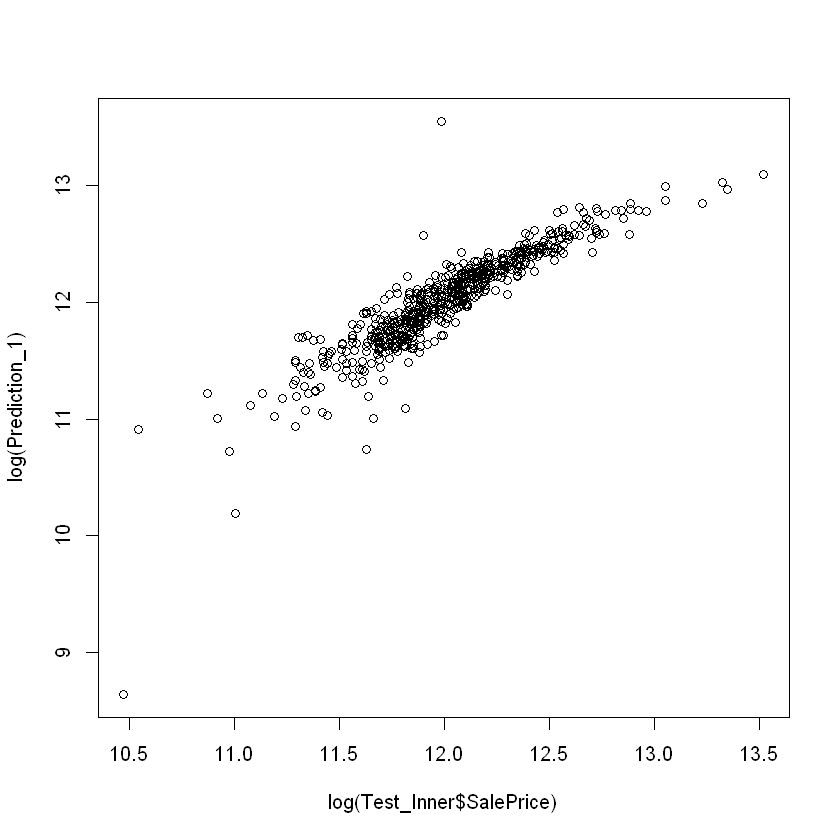

In [30]:
Prediction_1<- predict(reg1_Modified_2, newdata= Test_Inner)
rmse(log(Test_Inner$SalePrice),log(Prediction_1))
plot(log(Test_Inner$SalePrice),log(Prediction_1))

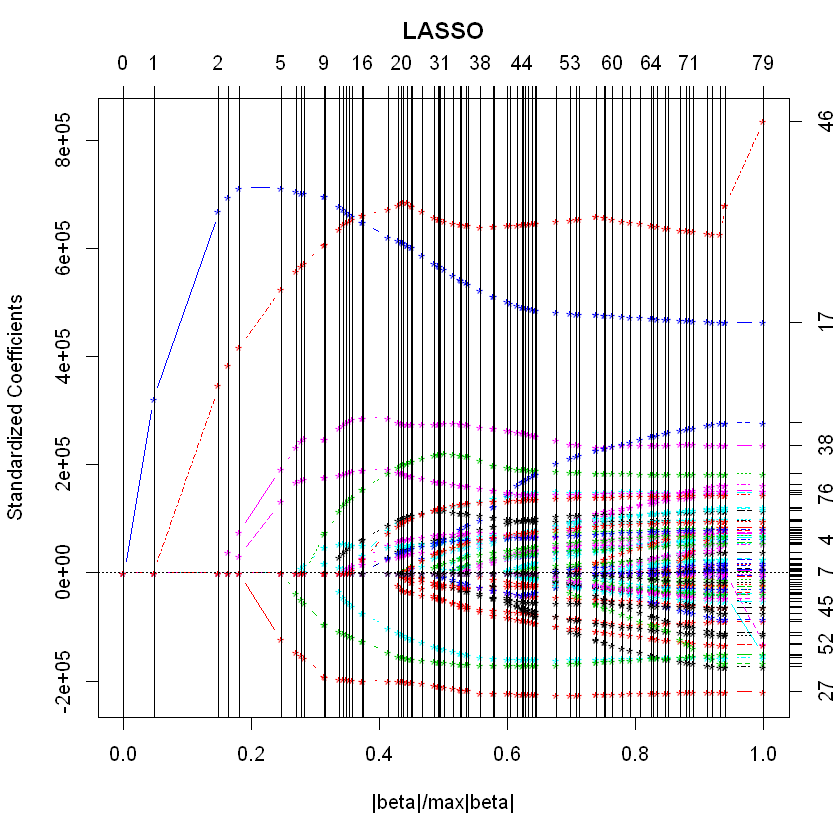

In [31]:
##### Lasso regression 
Independent_variable<- as.matrix(Training_Inner[,1:76])
Dependent_Variable<- as.matrix(Training_Inner[,77])
laa<- lars(Independent_variable,Dependent_Variable,type = 'lasso')
plot(laa)

[1] 0.1623512

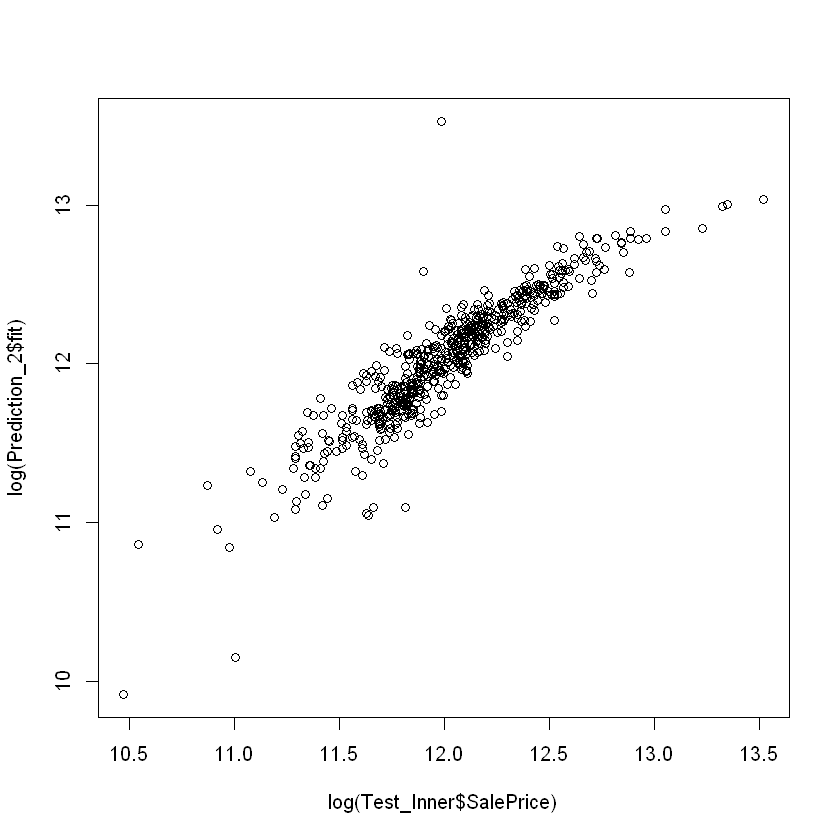

In [34]:
best_step<- laa$df[which.min(laa$Cp)]   # This take the best parameter that has the minimum Cp
Prediction_2<- predict.lars(laa,newx =as.matrix(Test_Inner[,1:76]),
                            s=best_step, type= "fit")
rmse(log(Test_Inner$SalePrice),log(Prediction_2$fit))
plot(log(Test_Inner$SalePrice),log(Prediction_2$fit))

[1] 0.1489605

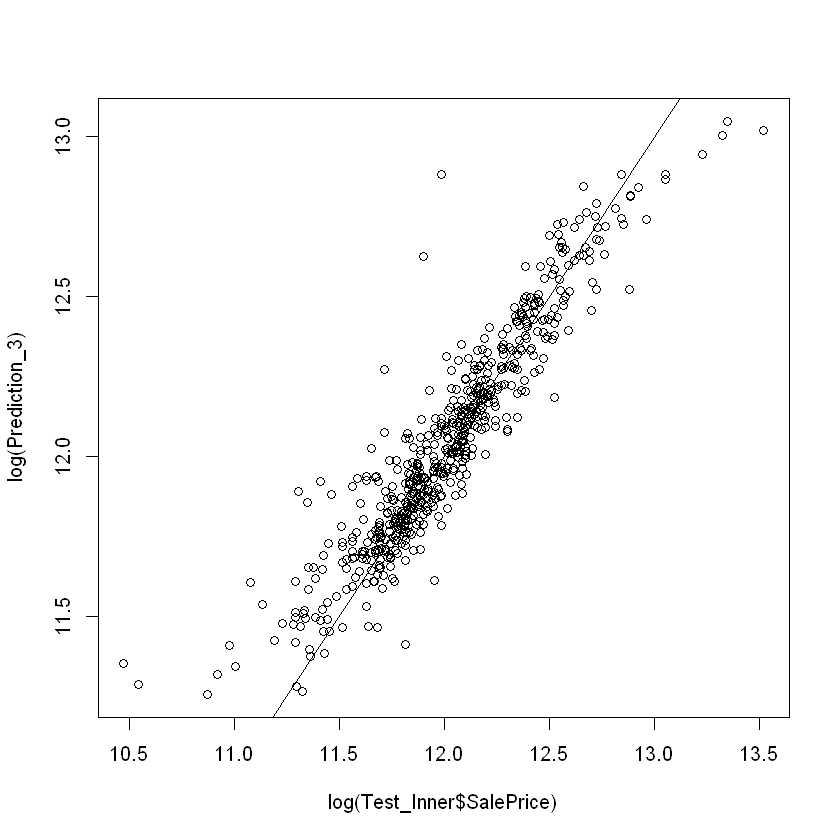

In [38]:
#### Random Forest
for_1<- randomForest(SalePrice~.,data= Training_Inner)
Prediction_3 <- predict(for_1, newdata= Test_Inner)
rmse(log(Test_Inner$SalePrice),log(Prediction_3))
plot(log(Test_Inner$SalePrice),log(Prediction_3))
abline(a=0, b=1)

It's good but not very good.... Buy the way is clear that the true function is not a simple linear function

In [42]:
### XGBoost 
train<- as.matrix(Training_Inner, rownames.force=NA)
test<- as.matrix(Test_Inner, rownames.force=NA)
train <- as(train, "sparseMatrix")
test <- as(test, "sparseMatrix")
# Never forget to exclude objective variable in 'data option'
train_Data <- xgb.DMatrix(data = train[,2:76], label = train[,"SalePrice"])
test_Data <- xgb.DMatrix(data = test[,2:76], label = test[,"SalePrice"])

In [114]:
watchlist <- list(train=train_Data, test=test_Data)

bst <- xgb.train(data=train_Data, max.depth=10, eta=0.09, nthread = 2,
                 booster= "gblinear",
                 metric = "RMSE",
                 nround=500, watchlist=watchlist, objective = "reg:linear")

[1]	train-rmse:67055.210938	test-rmse:66708.687500 
[2]	train-rmse:61503.433594	test-rmse:61914.414062 
[3]	train-rmse:56948.289062	test-rmse:58000.789062 
[4]	train-rmse:53270.273438	test-rmse:54874.125000 
[5]	train-rmse:50325.796875	test-rmse:52461.335938 
[6]	train-rmse:47948.957031	test-rmse:50568.402344 
[7]	train-rmse:46014.164062	test-rmse:49041.195312 
[8]	train-rmse:44424.378906	test-rmse:47840.621094 
[9]	train-rmse:43113.566406	test-rmse:46904.554688 
[10]	train-rmse:42027.304688	test-rmse:46149.324219 
[11]	train-rmse:41112.773438	test-rmse:45531.187500 
[12]	train-rmse:40335.199219	test-rmse:45022.472656 
[13]	train-rmse:39666.949219	test-rmse:44600.820312 
[14]	train-rmse:39082.402344	test-rmse:44240.410156 
[15]	train-rmse:38574.074219	test-rmse:43935.566406 
[16]	train-rmse:38117.781250	test-rmse:43666.457031 
[17]	train-rmse:37710.964844	test-rmse:43434.332031 
[18]	train-rmse:37345.589844	test-rmse:43230.667969 
[19]	train-rmse:37012.781250	test-rmse:43047.863281 
[2

In [115]:
Prediction_4 <- predict(bst, test_Data)

[1] 0.163603

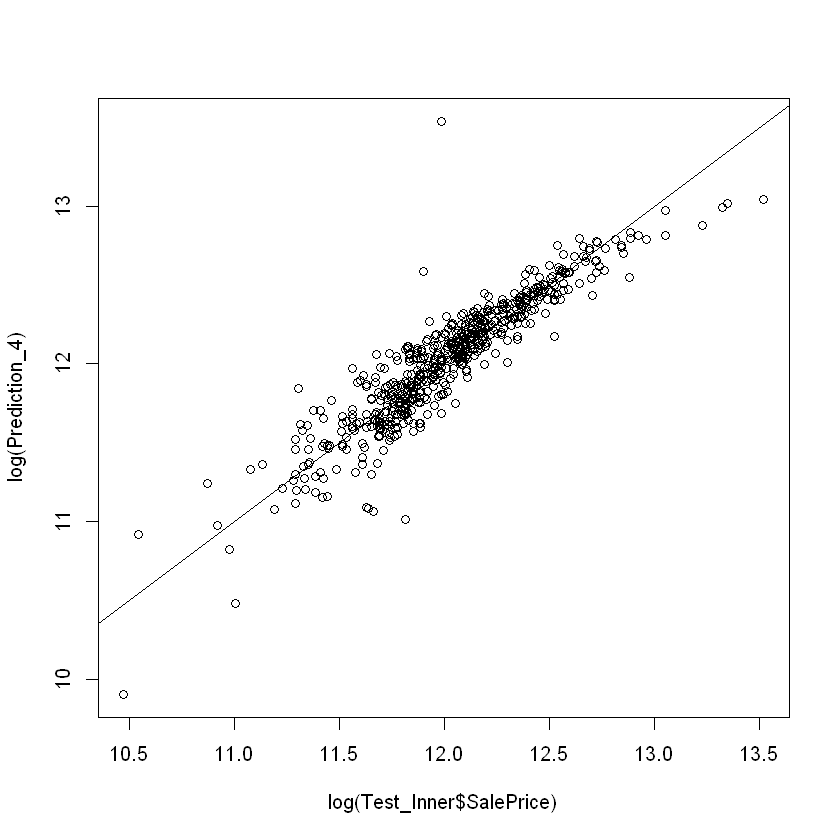

In [116]:
rmse(log(Test_Inner$SalePrice),log(Prediction_4))
plot(log(Test_Inner$SalePrice),log(Prediction_4))
abline(a=0, b=1)

In [40]:
# Tuning the parameters #
cv.ctrl <- trainControl(method = "repeatedcv", repeats = 1,number = 3)

xgb.grid <- expand.grid(nrounds = 500,
                        max_depth = seq(6,10),
                        eta = c(0.01,0.3, 1),
                        gamma = c(0.0, 0.2, 1),
                        colsample_bytree = c(0.5,0.8, 1),
                        min_child_weight=seq(1,10)
)

In [41]:
xgb_tune <-train(SalePrice ~.,
                 data=Training_Inner,
                 method="xgbTree",
                 metric = "RMSE",
                 trControl=cv.ctrl,
                 tuneGrid=xgb.grid
)

print(xgb.grid)

ERROR: Error: The tuning parameter grid should have columns nrounds, max_depth, eta, gamma, colsample_bytree, min_child_weight, subsample
